In [199]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [200]:
def loadbd(filename):
    bd = []
    time = []
    with open(filename) as f:
        while 1:
            line = f.readline()
            if not line:
                break
            if 'Band' in line:
                line = line.strip('\n').split(' ')
                bd.append(float(line[-2]))
                time.append(float(line[1]))
    bd = np.median(np.array(bd))
    time = np.median(np.array(time))
    return bd,time

In [201]:
arch=['p100','v100','a100']
gsize=['1','2','4']
typestr = [
    ['cublas1s','cublas2s','cublas4s','magma_maxcheck','magma_nocheck','magma_fixedbatch'],
    ['cublas1s','cublas2s','magma_maxcheck','magma_nocheck','magma_fixedbatch'],
    ['cublas1s','magma_maxcheck','magma_nocheck','magma_fixedbatch']
]

In [202]:
timelist = []
bdlist = []
archlist = []
typelist = []
gpusize = []
for a in arch:
    for t in typestr[2]:
        for g in [1,2,4]:
            prefix='log_tlrmv/log_{}_{}_{}gpu.log'.format(t,a,g)
            b,time = loadbd(prefix)
            avgb = b
            avgt = time
            timelist.append(avgt)
            bdlist.append(avgb)
            archlist.append(a)
            typelist.append(t)
            gpusize.append(g)
df = pd.DataFrame()
df['time'] = timelist
df['bandwidth'] = bdlist
df['arch'] = archlist
df['type'] = typelist
df['gpusize'] = gpusize

In [203]:
g=2
prefix='log_tlrmv/log_{}_{}_{}gpu.log'.format(selecttype,selectarch,g)
print(prefix)
b,time = loadbd(prefix)
avgb = np.array(b).mean()
avgt = np.array(time).mean()

log_tlrmv/log_magma_fixedbatch_p100_2gpu.log


In [204]:
selectarch = 'p100'
selecttype = 'magma_fixedbatch'

In [205]:
data = df[ (df.arch ==selectarch) & (df.type == selecttype)]

In [206]:
data

,time,bandwidth,arch,type,gpusize
9,0.000680,588.20,p100,magma_fixedbatch,1
10,0.000362,1105.49,p100,magma_fixedbatch,2
11,0.000228,1755.38,p100,magma_fixedbatch,4


In [207]:
timearr = data.time.to_numpy()

In [208]:
timearr

array([0.00068 , 0.000362, 0.000228])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


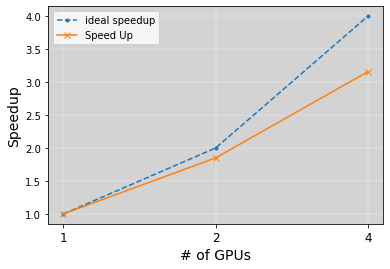

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


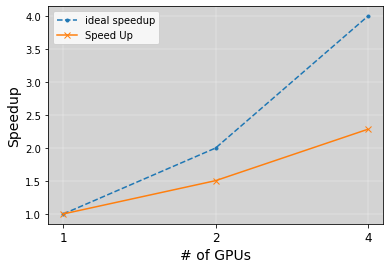

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


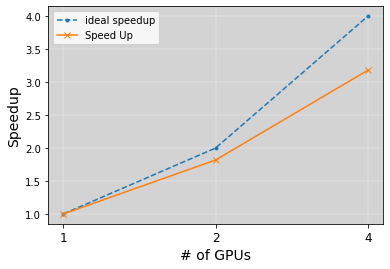

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


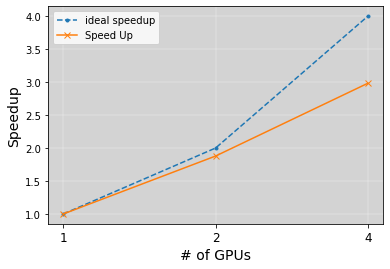

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


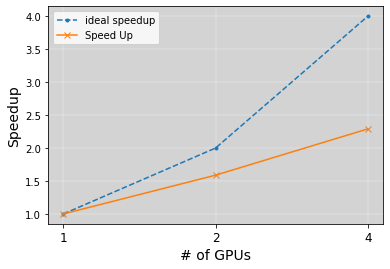

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


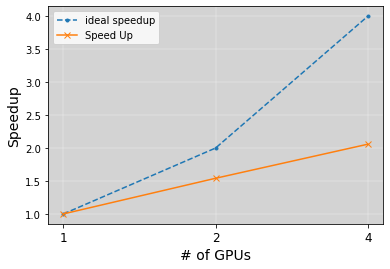

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


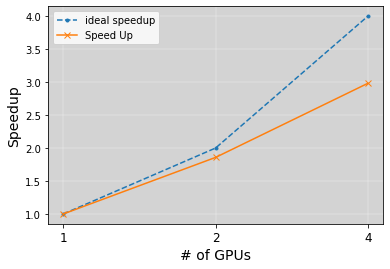

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


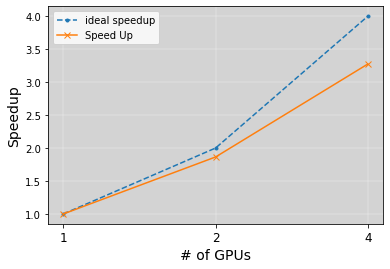

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


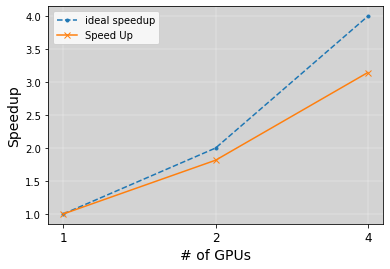

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


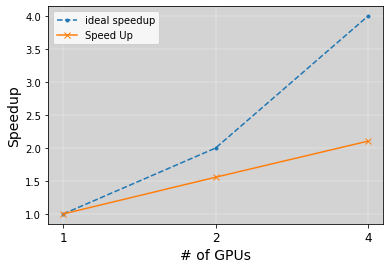

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


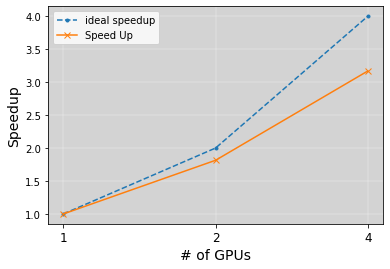

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


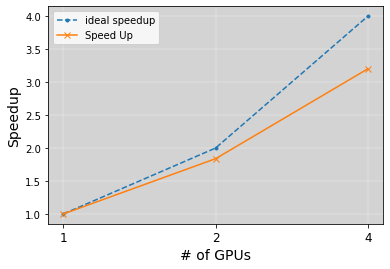

In [211]:
for a in ['p100','v100','a100']:
    for t in typestr[2]:
        data = df[ (df.arch ==a) & (df.type == t)]
        timearr = data.time.to_numpy()
        fig, ax = plt.subplots()
        ax.set_facecolor('lightgrey')
        ax.set_alpha(0.0001)
        ax.set_ylabel('Speedup', fontsize=14)
        plttimearr = timearr[0] / timearr
        plt.plot([1,2,4],linestyle='dashed',label='ideal speedup',marker='.')
        plt.plot(plttimearr,marker='x',label='Speed Up')
        xtick = ['1','2','4']
        plt.grid(which='both', color='white', linewidth='0.3')
        plt.xlabel("# of GPUs", fontsize=14)
        plt.xticks(range(len(xtick)), xtick,fontsize=12)
        descstr = "speedup {} {}".format(a.upper(), t)
#         plt.title(descstr,fontsize=14)
        plt.legend()
        plt.savefig('tlrmvplots/speedup/speedup_{}_{}.eps'.format(a, t))
        plt.show()
